## Simple Neural Net

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

In [6]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]    # In Celsius
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]    # No units
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [9]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[n_val:]

train_t_u = t_u[train_indices]
val_t_u = t_u[val_indices]

t_c_train = t_c[train_indices]
t_c_val = t_c[val_indices]

t_un_train = train_t_u * 0.1
t_un_val = val_t_u * 0.1

In [117]:
t_c_val.shape, t_un_val.shape

(torch.Size([9, 1]), torch.Size([9, 1]))

In [16]:
linear_model = nn.Linear(1, 1)  # Num input features, num output features
linear_model(t_un_val).detach().numpy()

array([[2.8833995],
       [2.3221292],
       [1.5421069],
       [1.9421921],
       [3.2719717],
       [2.535124 ],
       [2.5236108],
       [2.5898118],
       [2.3077374]], dtype=float32)

In [17]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.2878]], requires_grad=True),
 Parameter containing:
 tensor([0.9146], requires_grad=True))

In [18]:
x = torch.ones(1)
linear_model(x)

tensor([1.2025], grad_fn=<ViewBackward0>)

In [20]:
batch_x = torch.ones(10, 1)
linear_model(batch_x).detach()

tensor([[1.2025],
        [1.2025],
        [1.2025],
        [1.2025],
        [1.2025],
        [1.2025],
        [1.2025],
        [1.2025],
        [1.2025],
        [1.2025]])

In [35]:
linear_model = nn.Linear(1, 1)
optimizer_sgd = optim.SGD(linear_model.parameters(), 1e-2)

In [36]:
def forward_call(model, loss_fn, data, targets, is_train=True):
    with torch.set_grad_enabled(is_train):
        out = model(data)
        loss = loss_fn(out, targets)
    return loss

def training_loop(n_epochs, model, optimizer, loss_fn, train_data, train_targets, val_data, val_targets):
    for epoch in range(n_epochs):
        train_loss = forward_call(model, loss_fn, train_data, train_targets)
        val_loss = forward_call(model, loss_fn, val_data, val_targets, False)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if (epoch + 1) % 200 == 0 or epoch <= 3:
            print(f'Epoch {epoch + 1:>4}:    Train Loss {train_loss.float():.4f}    Val Loss {val_loss.float():.4f}')

In [37]:
training_loop(3000, linear_model, optimizer_sgd, nn.MSELoss(), t_un_train, t_c_train, t_un_val, t_c_val)

Epoch    1:    Train Loss 188.2718    Val Loss 196.9988
Epoch    2:    Train Loss 56.7837    Val Loss 59.1701
Epoch    3:    Train Loss 36.6289    Val Loss 37.6256
Epoch    4:    Train Loss 33.4513    Val Loss 34.0758
Epoch  200:    Train Loss 16.2877    Val Loss 17.6336
Epoch  400:    Train Loss 8.6883    Val Loss 10.0807
Epoch  600:    Train Loss 5.3130    Val Loss 6.4752
Epoch  800:    Train Loss 3.8138    Val Loss 4.7067
Epoch 1000:    Train Loss 3.1479    Val Loss 3.8098
Epoch 1200:    Train Loss 2.8521    Val Loss 3.3373
Epoch 1400:    Train Loss 2.7207    Val Loss 3.0779
Epoch 1600:    Train Loss 2.6624    Val Loss 2.9297
Epoch 1800:    Train Loss 2.6365    Val Loss 2.8420
Epoch 2000:    Train Loss 2.6250    Val Loss 2.7883
Epoch 2200:    Train Loss 2.6199    Val Loss 2.7547
Epoch 2400:    Train Loss 2.6176    Val Loss 2.7333
Epoch 2600:    Train Loss 2.6166    Val Loss 2.7195
Epoch 2800:    Train Loss 2.6161    Val Loss 2.7104
Epoch 3000:    Train Loss 2.6159    Val Loss 2.7045

In [38]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [40]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [41]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [42]:
# Sequential also allows Order dicts
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_layer', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_layer', nn.Linear(8, 1))
]))

In [43]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_layer.weight torch.Size([8, 1])
hidden_layer.bias torch.Size([8])
output_layer.weight torch.Size([1, 8])
output_layer.bias torch.Size([1])


In [45]:
optimizer_sgd = optim.SGD(seq_model.parameters(), 1e-3)
training_loop(3000, seq_model, optimizer_sgd, nn.MSELoss(), t_un_train, t_c_train, t_un_val, t_c_val)

Epoch    1:    Train Loss 197.1738    Val Loss 206.2709
Epoch    2:    Train Loss 193.0380    Val Loss 201.9187
Epoch    3:    Train Loss 189.0106    Val Loss 197.6786
Epoch    4:    Train Loss 185.1427    Val Loss 193.6025
Epoch  200:    Train Loss 39.6420    Val Loss 41.5249
Epoch  400:    Train Loss 14.9635    Val Loss 16.4628
Epoch  600:    Train Loss 8.9189    Val Loss 9.2223
Epoch  800:    Train Loss 6.6749    Val Loss 6.5050
Epoch 1000:    Train Loss 5.2463    Val Loss 4.9072
Epoch 1200:    Train Loss 4.2282    Val Loss 3.7014
Epoch 1400:    Train Loss 6.7598    Val Loss 6.7420
Epoch 1600:    Train Loss 5.6030    Val Loss 5.5011
Epoch 1800:    Train Loss 4.8557    Val Loss 4.7487
Epoch 2000:    Train Loss 4.2754    Val Loss 4.1935
Epoch 2200:    Train Loss 3.8301    Val Loss 3.8004
Epoch 2400:    Train Loss 3.4889    Val Loss 3.5301
Epoch 2600:    Train Loss 3.2115    Val Loss 3.3266
Epoch 2800:    Train Loss 2.9685    Val Loss 3.1471
Epoch 3000:    Train Loss 2.7456    Val Loss

In [46]:
seq_model.hidden_layer.weight.grad

tensor([[ -0.3843],
        [ -0.5207],
        [ -0.3931],
        [ -5.7128],
        [ 28.2589],
        [ 25.5649],
        [-29.1481],
        [ 28.5142]])

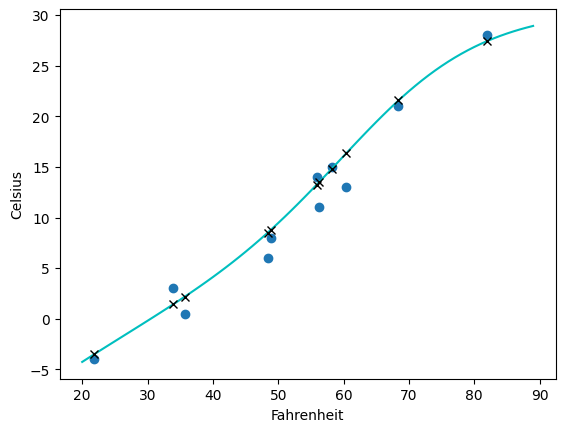

In [51]:
import matplotlib.pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig_ = plt.figure()
plt.xlabel('Fahrenheit')
plt.ylabel('Celsius')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

## Exercises

### Exercise 1

In [52]:
import matplotlib.pyplot as plt

def plot(model):
    t_ran = torch.arange(20., 90.).unsqueeze(1)

    plt.xlabel('Fahrenheit')
    plt.ylabel('Celsius')
    plt.plot(t_u.numpy(), t_c.numpy(), 'o')
    plt.plot(t_ran.numpy(), model(0.1 * t_ran).detach().numpy(), 'c-')
    plt.plot(t_u.numpy(), model(0.1 * t_u).detach().numpy(), 'kx')

In [53]:
def forward_call(model, loss_fn, data, targets, is_train=True):
    with torch.set_grad_enabled(is_train):
        out = model(data)
        loss = loss_fn(out, targets)
    return loss

def training_loop(n_epochs, model, optimizer, loss_fn, train_data, train_targets, val_data, val_targets):
    for epoch in range(n_epochs):
        train_loss = forward_call(model, loss_fn, train_data, train_targets)
        val_loss = forward_call(model, loss_fn, val_data, val_targets, False)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if (epoch + 1) % 200 == 0 or epoch <= 3:
            print(f'Epoch {epoch + 1:>4}:    Train Loss {train_loss.float():.4f}    Val Loss {val_loss.float():.4f}')

Epoch    1:    Train Loss 208.7638    Val Loss 218.4417
Epoch    2:    Train Loss 184.4743    Val Loss 192.8419
Epoch    3:    Train Loss 161.8081    Val Loss 168.8334
Epoch    4:    Train Loss 138.0195    Val Loss 143.4303
Epoch  200:    Train Loss 89.4188    Val Loss 87.0047
Epoch  400:    Train Loss 89.6387    Val Loss 87.2033
Epoch  600:    Train Loss 89.7368    Val Loss 87.2932
Epoch  800:    Train Loss 89.8864    Val Loss 87.4522
Epoch 1000:    Train Loss 89.7560    Val Loss 87.3113
Epoch 1200:    Train Loss 89.6955    Val Loss 87.2577
Epoch 1400:    Train Loss 89.7333    Val Loss 87.2912
Epoch 1600:    Train Loss 89.7681    Val Loss 87.3237
Epoch 1800:    Train Loss 89.7332    Val Loss 87.2941
Epoch 2000:    Train Loss 89.7663    Val Loss 87.3222
Epoch 2200:    Train Loss 89.7551    Val Loss 87.3122
Epoch 2400:    Train Loss 89.4870    Val Loss 87.0693
Epoch 2600:    Train Loss 89.7456    Val Loss 87.3027
Epoch 2800:    Train Loss 89.2075    Val Loss 86.8346
Epoch 3000:    Train

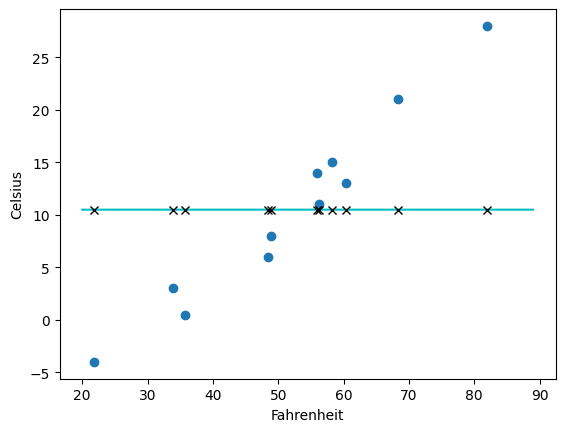

In [57]:
# More Layers
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)
optimizer_sgd = optim.SGD(seq_model.parameters(), 1e-2)
training_loop(3000, seq_model, optimizer_sgd, nn.MSELoss(), t_un_train, t_c_train, t_un_val, t_c_val)
plot(seq_model)

The learning rate is too high.

Epoch    1:    Train Loss 201.0273    Val Loss 210.3038
Epoch    2:    Train Loss 198.2935    Val Loss 207.4236
Epoch    3:    Train Loss 195.6072    Val Loss 204.5917
Epoch    4:    Train Loss 192.9584    Val Loss 201.7979
Epoch  200:    Train Loss 81.4349    Val Loss 80.3231
Epoch  400:    Train Loss 28.1593    Val Loss 34.0940
Epoch  600:    Train Loss 18.4868    Val Loss 19.5411
Epoch  800:    Train Loss 38.4660    Val Loss 48.3271
Epoch 1000:    Train Loss 13.5188    Val Loss 14.3215
Epoch 1200:    Train Loss 10.5176    Val Loss 11.1653
Epoch 1400:    Train Loss 6.9279    Val Loss 7.4145
Epoch 1600:    Train Loss 5.3843    Val Loss 5.8962
Epoch 1800:    Train Loss 4.5248    Val Loss 5.0874
Epoch 2000:    Train Loss 3.9252    Val Loss 4.5252
Epoch 2200:    Train Loss 3.4543    Val Loss 4.0820
Epoch 2400:    Train Loss 3.0533    Val Loss 3.7034
Epoch 2600:    Train Loss 2.7127    Val Loss 3.3797
Epoch 2800:    Train Loss 2.4461    Val Loss 3.1245
Epoch 3000:    Train Loss 2.2524    

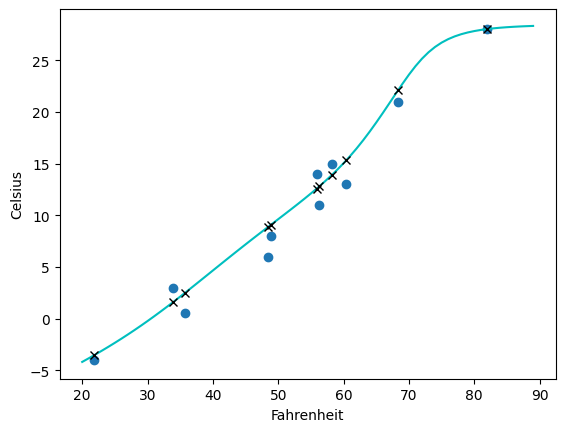

In [58]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)
optimizer_sgd = optim.SGD(seq_model.parameters(), 1e-3)
training_loop(3000, seq_model, optimizer_sgd, nn.MSELoss(), t_un_train, t_c_train, t_un_val, t_c_val)
plot(seq_model)

Epoch    1:    Train Loss 205.0948    Val Loss 214.5861
Epoch    2:    Train Loss 204.7670    Val Loss 214.2411
Epoch    3:    Train Loss 204.4402    Val Loss 213.8971
Epoch    4:    Train Loss 204.1144    Val Loss 213.5543
Epoch  200:    Train Loss 150.6279    Val Loss 156.9054
Epoch  400:    Train Loss 113.5553    Val Loss 116.8176
Epoch  600:    Train Loss 95.6478    Val Loss 96.7270
Epoch  800:    Train Loss 87.5311    Val Loss 87.3917
Epoch 1000:    Train Loss 79.9249    Val Loss 79.7355
Epoch 1200:    Train Loss 68.9332    Val Loss 69.6714
Epoch 1400:    Train Loss 57.0436    Val Loss 58.4312
Epoch 1600:    Train Loss 45.0621    Val Loss 46.9921
Epoch 1800:    Train Loss 34.9106    Val Loss 37.0804
Epoch 2000:    Train Loss 27.3374    Val Loss 29.4040
Epoch 2200:    Train Loss 22.1491    Val Loss 23.8501
Epoch 2400:    Train Loss 18.6665    Val Loss 19.8924
Epoch 2600:    Train Loss 16.2180    Val Loss 16.9939
Epoch 2800:    Train Loss 14.3618    Val Loss 14.7737
Epoch 3000:    T

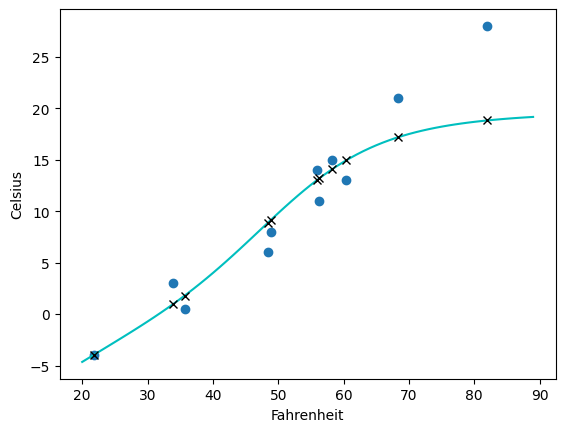

In [59]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)
optimizer_sgd = optim.SGD(seq_model.parameters(), 1e-4)
training_loop(3000, seq_model, optimizer_sgd, nn.MSELoss(), t_un_train, t_c_train, t_un_val, t_c_val)
plot(seq_model)

Learning Rate too low

Epoch    1:    Train Loss 199.6207    Val Loss 208.8106
Epoch    2:    Train Loss 157.8501    Val Loss 164.6144
Epoch    3:    Train Loss 133.6027    Val Loss 138.6196
Epoch    4:    Train Loss 119.7344    Val Loss 123.4832
Epoch  200:    Train Loss 5.6028    Val Loss 5.9137
Epoch  400:    Train Loss 0.9001    Val Loss 1.5118
Epoch  600:    Train Loss 0.5761    Val Loss 1.2897
Epoch  800:    Train Loss 0.5212    Val Loss 1.2701
Epoch 1000:    Train Loss 0.5143    Val Loss 1.2705
Epoch 1200:    Train Loss 0.5115    Val Loss 1.2399
Epoch 1400:    Train Loss 0.5104    Val Loss 1.2361
Epoch 1600:    Train Loss 0.5097    Val Loss 1.2381
Epoch 1800:    Train Loss 0.5117    Val Loss 1.2287
Epoch 2000:    Train Loss 0.5081    Val Loss 1.2275


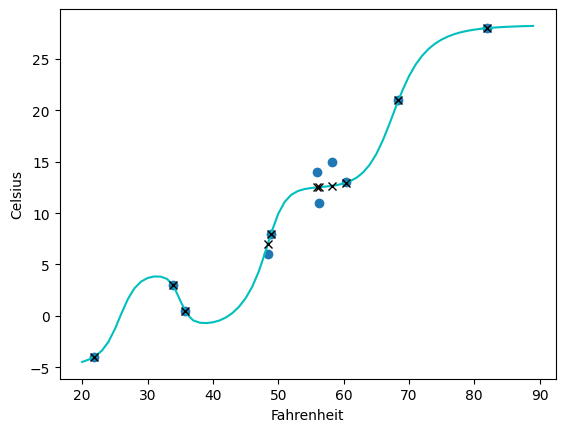

In [68]:
seq_model = nn.Sequential(
    nn.Linear(1, 500),
    nn.Tanh(),
    nn.Linear(500, 300),
    nn.Tanh(),
    nn.Linear(300, 200),
    nn.Tanh(),
    nn.Linear(200, 1)
)
optimizer_sgd = optim.Adam(seq_model.parameters(), 1e-3)
training_loop(2000, seq_model, optimizer_sgd, nn.MSELoss(), t_un_train, t_c_train, t_un_val, t_c_val)
plot(seq_model)

Obvious overfitting.

### Exercise 2

In [69]:
import csv
import numpy as np

wine_path = 'data/ch4/tabular-wine/winequality-white.csv'
wine_np = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)
wine_np.shape

(4898, 12)

In [70]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))
col_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [100]:
wine_data = torch.from_numpy(wine_np)
wine_data.shape

torch.Size([4898, 12])

In [101]:
# Standardize numerical columns
column_mean = wine_data[:, :-1].mean(dim=0)
column_std = wine_data[:, :-1].std(dim=0)

wine_data[:, :-1] = (wine_data[:, :-1] - column_mean) / column_std
wine_data[:, -1] = wine_data[:, -1].long()

In [102]:
wine_data

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -3.4915e-01,
         -1.3930e+00,  6.0000e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  1.3418e-03,
         -8.2419e-01,  6.0000e+00],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ..., -4.3677e-01,
         -3.3663e-01,  6.0000e+00],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -2.6153e-01,
         -9.0545e-01,  6.0000e+00],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ..., -9.6251e-01,
          1.8574e+00,  7.0000e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ..., -1.4882e+00,
          1.0448e+00,  6.0000e+00]])

In [104]:
n_samples = wine_data.shape[0]
val_size = int(n_samples * 0.2)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-val_size]
val_indices = shuffled_indices[val_size:]

train_wine = wine_data[train_indices]
val_wine = wine_data[val_indices]

In [114]:
train_x = train_wine[:, :-1]
train_y = train_wine[:, -1].unsqueeze(1)

val_x = val_wine[:, :-1]
val_y = val_wine[:, -1].unsqueeze(1)

In [115]:
val_y.shape

torch.Size([3919, 1])

In [118]:
def forward_fn(model, loss_fn, data_x, data_y, is_train=True):
    with torch.set_grad_enabled(is_train):
        out = model(data_x)
        loss = loss_fn(out, data_y)
    return loss

def training_loop(n_epochs, model, optimizer, loss_fn, train_data, train_targets, val_data, val_targets):
    for epoch in range(n_epochs):
        train_loss = forward_fn(model, loss_fn, train_data, train_targets)
        val_loss = forward_fn(model, loss_fn, val_data, val_targets)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if (epoch + 1) % 200 == 0 or epoch <= 3:
            print(f'Epoch {epoch + 1:>4}:    Train Loss {train_loss.float():.4f}    Val Loss {val_loss.float():.4f}')

In [119]:
new_model = nn.Sequential(
    nn.Linear(11, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 7)
)
optimizer_adam = optim.Adam(new_model.parameters(), 1e-3)
training_loop(3000, new_model, optimizer_adam, nn.MSELoss(), train_x, train_y, val_x, val_y)

Epoch    1:    Train Loss 35.1278    Val Loss 35.1897
Epoch    2:    Train Loss 34.7484    Val Loss 34.8098
Epoch    3:    Train Loss 34.3666    Val Loss 34.4275
Epoch    4:    Train Loss 33.9794    Val Loss 34.0398
Epoch  200:    Train Loss 0.5385    Val Loss 0.5450
Epoch  400:    Train Loss 0.5069    Val Loss 0.5172
Epoch  600:    Train Loss 0.4853    Val Loss 0.4982
Epoch  800:    Train Loss 0.4666    Val Loss 0.4826
Epoch 1000:    Train Loss 0.4462    Val Loss 0.4669
Epoch 1200:    Train Loss 0.4262    Val Loss 0.4516
Epoch 1400:    Train Loss 0.4072    Val Loss 0.4359
Epoch 1600:    Train Loss 0.3911    Val Loss 0.4237
Epoch 1800:    Train Loss 0.3749    Val Loss 0.4116
Epoch 2000:    Train Loss 0.3570    Val Loss 0.3981
Epoch 2200:    Train Loss 0.3364    Val Loss 0.3833
Epoch 2400:    Train Loss 0.3142    Val Loss 0.3686
Epoch 2600:    Train Loss 0.2901    Val Loss 0.3543
Epoch 2800:    Train Loss 0.2649    Val Loss 0.3379
Epoch 3000:    Train Loss 0.2387    Val Loss 0.3198
